# Project Title: Marketing Campaign for Banking Products


Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors).The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The dataset contains data on 5000 customers

The case is The Bank has a customers Data with various characteristics of the customers. The management built a new product - Personal Loan, and ran a small campaign towards selling the New Product to their clients. After some time, 9% of customers have Personal Loan from The Bank.

The GOAL is to sell more Personal Loan products to Bank customers.
To devise campaigns to better target marketing to increase the success ratio with a minimal budget.
To identify the potential customers who have a higher probability of purchasing the loan.

Increase the success ratio of advertisement campaign while at the same time reduce the cost of the campaign.

# Importing the datasets and libraries, checking datatype, statistical summary, shape, null values etc

In [266]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [267]:
df_bank_personal_loan = pd.read_excel("/Users/sooriya/Downloads/Bank_Personal_Loan_Modelling.xlsx",sheet_name = "Data")

In [268]:
df_bank_personal_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [269]:
df_bank_personal_loan.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


# Preprocessing Dataset

Check the types of the Data

In [270]:
df_bank_personal_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [271]:
df_bank_personal_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Check Statistical Summary

In [272]:
df_bank_personal_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


By looking at the Description table, I could see that Experience has got invalid data which is -3 value and then zipcode has got 9307 which is also invalid.
To add on, ID column is not gonna be useful in predicting the target variable.
So, This feature will have to be dropped to have dataset clean.

Also, It seems like outliers are present in the following features based on the mean and max values : Experience,Income,CCAvg,Mortgage.

# Check the shape of dataframe and null values

In [273]:
df_bank_personal_loan.shape

(5000, 14)

In [274]:
df_bank_personal_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no Null values present in the dataset as evident from the above.

# Data Cleaning

# Dropping Irrelavant data and unuseful column

In [275]:
df_bank_personal_loan[df_bank_personal_loan['Age'] < 0]['Age'].count()

0

In [276]:
df_bank_personal_loan[df_bank_personal_loan['Experience'] < 0]['Experience'].count()

52

In [277]:
df_bank_personal_loan[df_bank_personal_loan['Experience'] < 0]['Experience'].value_counts()


-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [278]:
df_bank_personal_loan = df_bank_personal_loan[df_bank_personal_loan['Experience'] >= 0]

In [279]:
df_bank_personal_loan[df_bank_personal_loan['Experience'] < 0]['Experience'].count()

0

In [280]:
df_bank_personal_loan['Family'].value_counts()

1    1470
2    1274
4    1203
3    1001
Name: Family, dtype: int64

In [281]:
df_bank_personal_loan = pd.get_dummies(df_bank_personal_loan,columns=['Education'])

In [282]:
df_bank_personal_loan = pd.get_dummies(df_bank_personal_loan,columns=['Family'])

In [283]:
df_bank_personal_loan.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,1,0,0,0,0,1,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,0,1,0,1,0,0,0
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [284]:
df_bank_personal_loan.drop(['ID'],axis=1,inplace=True)


In [285]:
count = 0
for zip_code in df_bank_personal_loan['ZIP Code']:
    if zip_code < 10000:  # Assuming ZIP codes are integers
        count += 1
print(count)


1


In [286]:
df_bank_personal_loan = df_bank_personal_loan[df_bank_personal_loan['ZIP Code'] > 10000]

In [287]:
df_bank_personal_loan[df_bank_personal_loan['ZIP Code'] < 10000]['ZIP Code'].count()

0

In [288]:
df_bank_personal_loan.head()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1,49,91107,1.6,0,0,1,0,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,1.5,0,0,1,0,0,0,1,0,0,0,0,1,0
2,39,15,11,94720,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,9,100,94112,2.7,0,0,0,0,0,0,0,1,0,1,0,0,0
4,35,8,45,91330,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1


In [289]:
df_bank_personal_loan.tail()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
4995,29,3,40,92697,1.9,0,0,0,0,1,0,0,0,1,1,0,0,0
4996,30,4,15,92037,0.4,85,0,0,0,1,0,1,0,0,0,0,0,1
4997,63,39,24,93023,0.3,0,0,0,0,0,0,0,0,1,0,1,0,0
4998,65,40,49,90034,0.5,0,0,0,0,1,0,0,1,0,0,0,1,0
4999,28,4,83,92612,0.8,0,0,0,0,1,1,1,0,0,0,0,1,0


In [290]:
df_bank_personal_loan.columns


Index(['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Education_1', 'Education_2', 'Education_3', 'Family_1',
       'Family_2', 'Family_3', 'Family_4'],
      dtype='object')

In [291]:
#Checking for number of unique elements in the column
df_bank_personal_loan.nunique()

Age                    44
Experience             44
Income                162
ZIP Code              466
CCAvg                 108
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
Education_1             2
Education_2             2
Education_3             2
Family_1                2
Family_2                2
Family_3                2
Family_4                2
dtype: int64

In [292]:
# Number of people with zero mortgage
df_bank_personal_loan[df_bank_personal_loan['Mortgage'] == 0]['Mortgage'].value_counts()


0    3421
Name: Mortgage, dtype: int64

In [293]:
# Number of people with zero credit card spending per month
df_bank_personal_loan[df_bank_personal_loan['CCAvg'] == 0]['CCAvg'].value_counts()


0.0    106
Name: CCAvg, dtype: int64

In [294]:
# Value counts of Family column
df_bank_personal_loan['Family_1'].value_counts()

0    3477
1    1470
Name: Family_1, dtype: int64

In [295]:
# Value counts of Family column
df_bank_personal_loan['Family_2'].value_counts()

0    3673
1    1274
Name: Family_2, dtype: int64

In [296]:
# Value counts of Family column
df_bank_personal_loan['Family_3'].value_counts()

0    3946
1    1001
Name: Family_3, dtype: int64

In [297]:
# Value counts of Family column
df_bank_personal_loan['Family_4'].value_counts()

0    3745
1    1202
Name: Family_4, dtype: int64

In [298]:
# Value counts of Securities Account column
df_bank_personal_loan['Securities Account'].value_counts()


0    4431
1     516
Name: Securities Account, dtype: int64

In [299]:
# Value counts of CD Account column
df_bank_personal_loan['CD Account'].value_counts()


0    4645
1     302
Name: CD Account, dtype: int64

In [300]:
# Value counts of CreditCard column
df_bank_personal_loan['CreditCard'].value_counts()


0    3493
1    1454
Name: CreditCard, dtype: int64

In [301]:
# Value counts of Education_1 column
df_bank_personal_loan['Education_1'].value_counts()


0    2867
1    2080
Name: Education_1, dtype: int64

In [302]:
# Value counts of Education_2 column
df_bank_personal_loan['Education_2'].value_counts()

0    3560
1    1387
Name: Education_2, dtype: int64

In [303]:
# Value counts of Education_3 column
df_bank_personal_loan['Education_3'].value_counts()

0    3467
1    1480
Name: Education_3, dtype: int64

In [304]:
# Value counts of Online column
df_bank_personal_loan['Online'].value_counts()


1    2953
0    1994
Name: Online, dtype: int64

# Outliers Detection & Handling

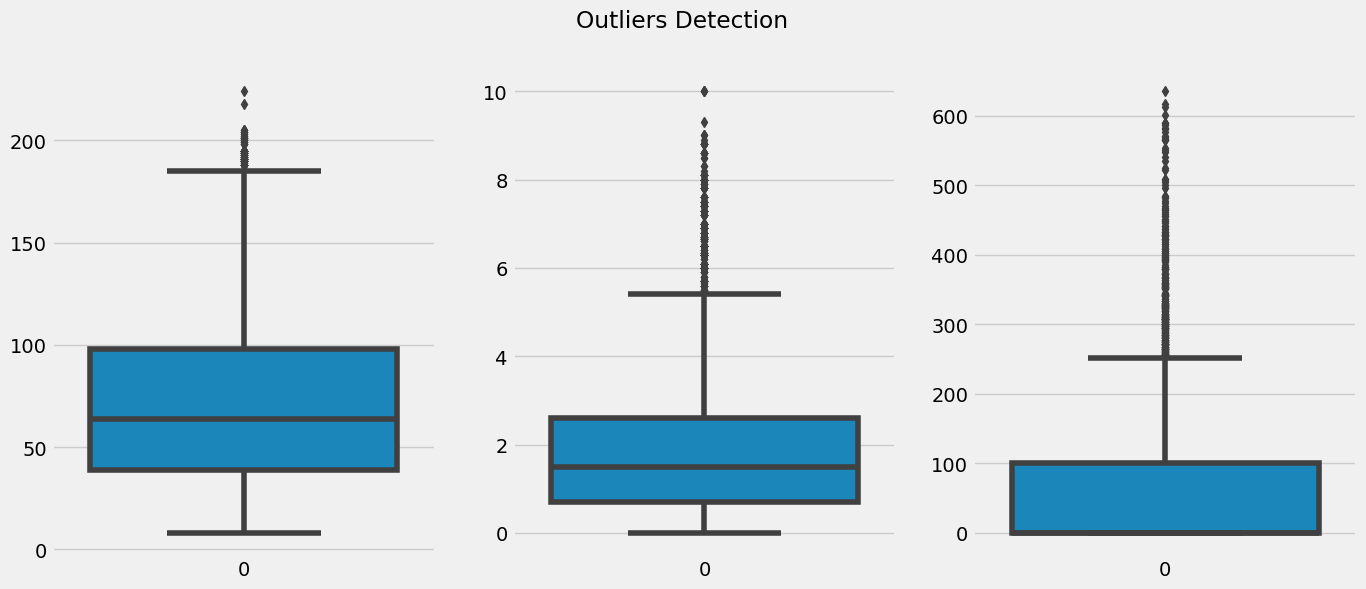

In [305]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(df_bank_personal_loan['Income'])

plt.subplot(1, 3, 2)
sns.boxplot(df_bank_personal_loan['CCAvg'])

plt.subplot(1, 3, 3)
sns.boxplot(df_bank_personal_loan['Mortgage'])

plt.suptitle("Outliers Detection")
plt.show()

In [306]:
print("Before Removing the outliers", df_bank_personal_loan.shape)

df_bank_personal_loan = df_bank_personal_loan[df_bank_personal_loan['Income']<215]

print("After Removing the outliers", df_bank_personal_loan.shape)

Before Removing the outliers (4947, 18)
After Removing the outliers (4945, 18)


In [307]:
print("Before Removing the outliers", df_bank_personal_loan.shape)

df_bank_personal_loan = df_bank_personal_loan[df_bank_personal_loan['CCAvg']<10]

print("After Removing the outliers", df_bank_personal_loan.shape)

Before Removing the outliers (4945, 18)
After Removing the outliers (4942, 18)


# Univariate Analysis

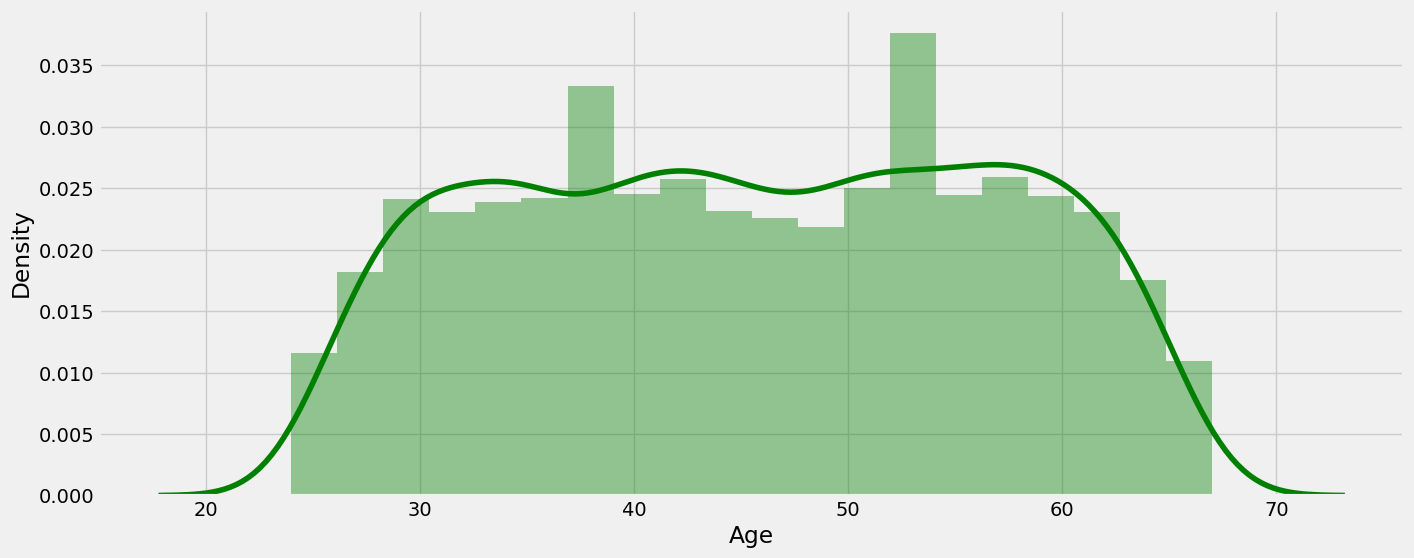

In [308]:
sns.distplot(df_bank_personal_loan["Age"],color='green')
plt.show()

Age has got Normal Distribution

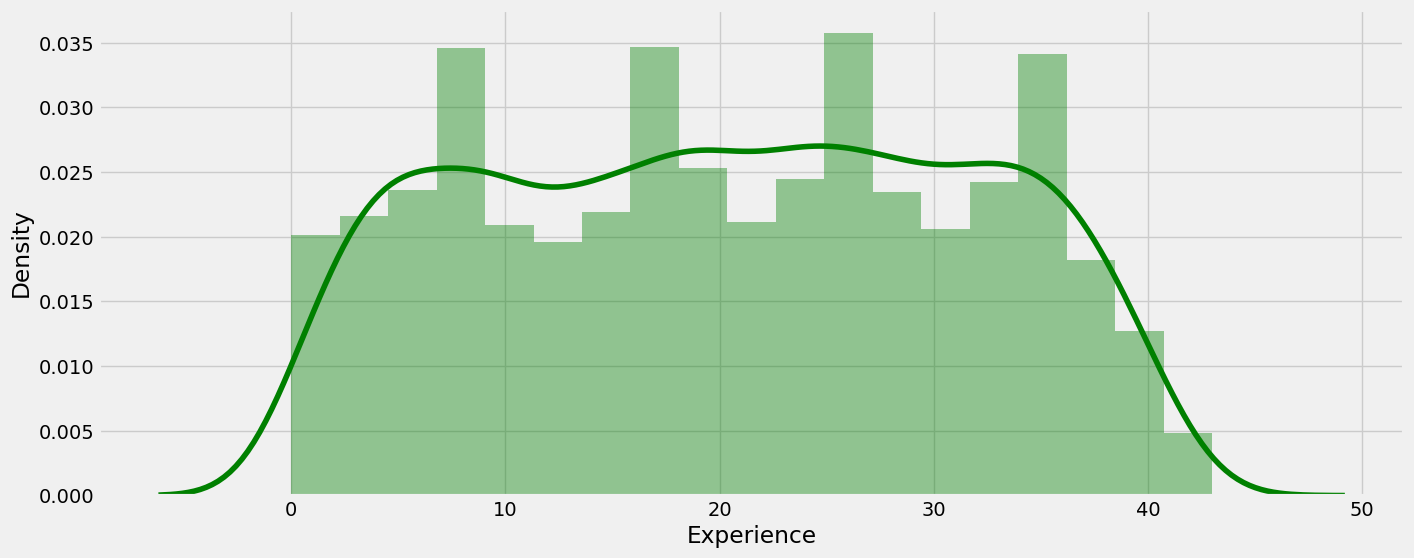

In [309]:
sns.distplot(df_bank_personal_loan["Experience"],color='green')
plt.show()

Experience has got Normal Distribution.

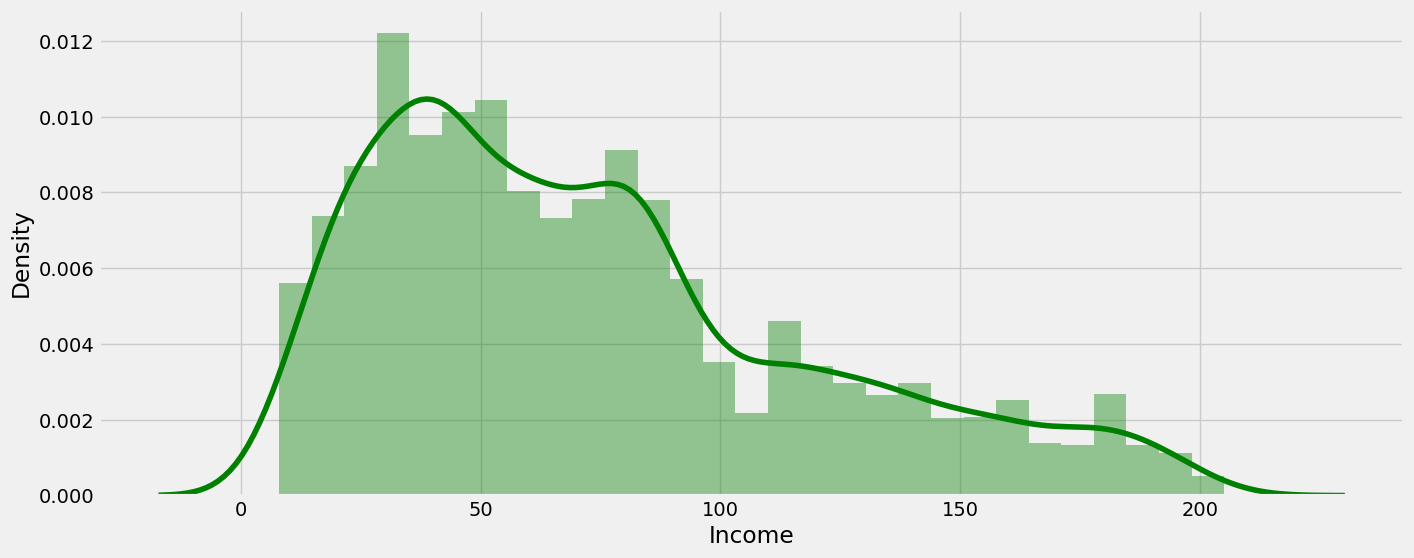

In [310]:
sns.distplot(df_bank_personal_loan["Income"],color='green')
plt.show()

Income has got Right Skewed Distribution.
Also, Income is more between the range of 30 to 50.

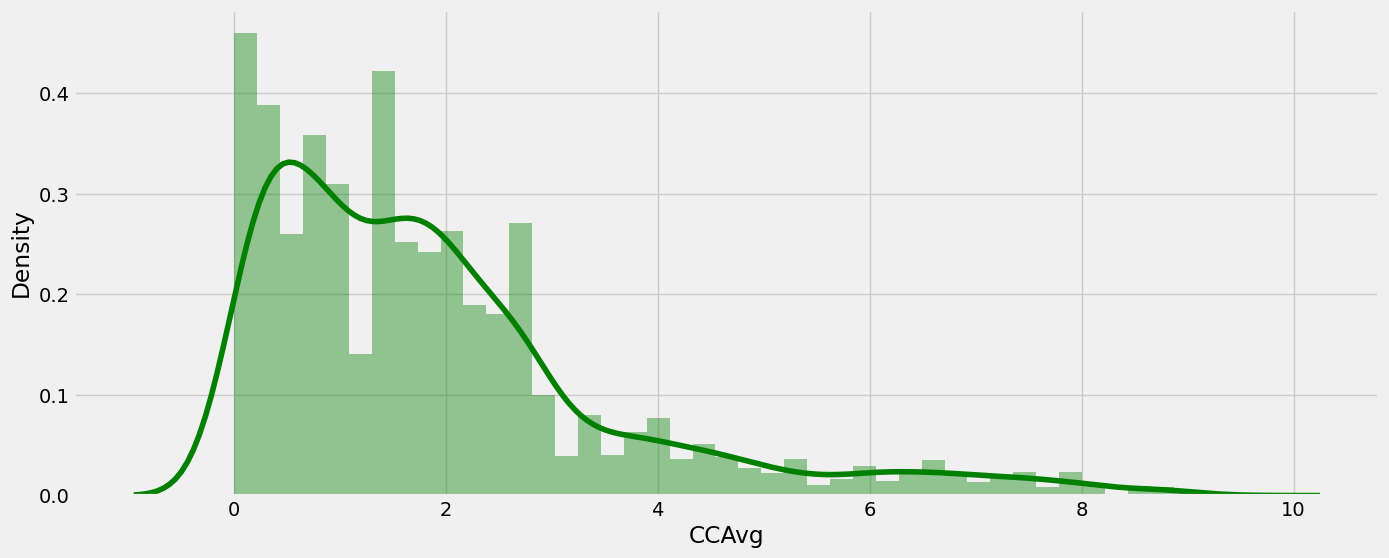

In [311]:
sns.distplot(df_bank_personal_loan["CCAvg"],color='green')
plt.show()

Experience has got Right Skewed Distribution

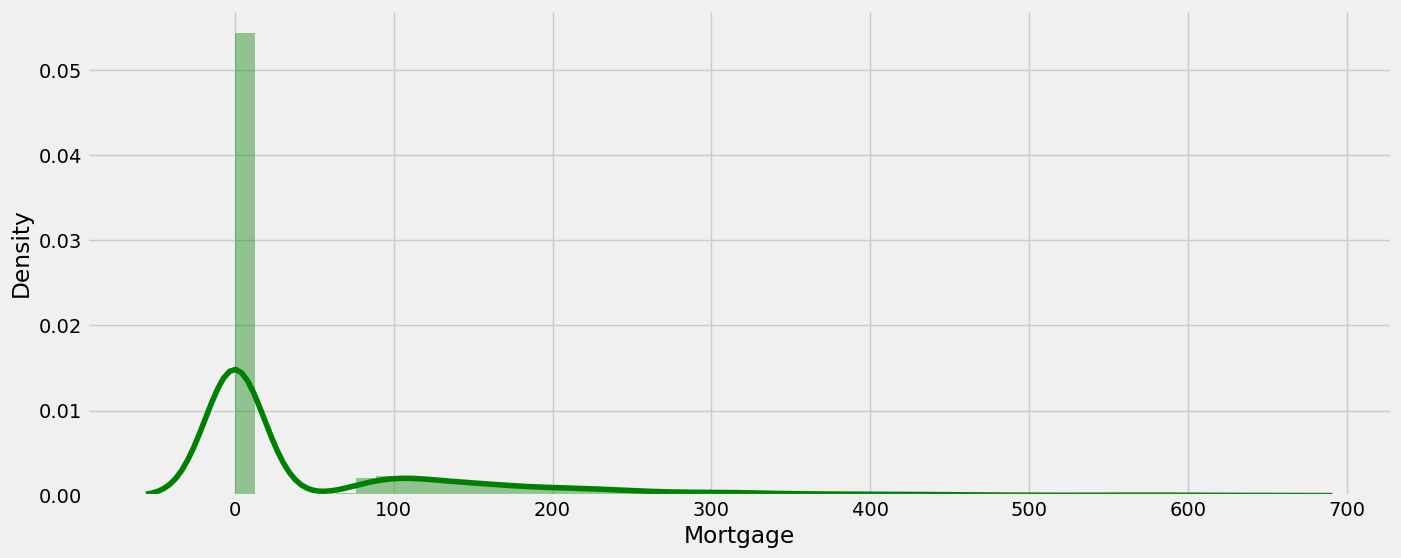

In [312]:
sns.distplot(df_bank_personal_loan["Mortgage"],color='green')
plt.show()

Mortgage seems to be highly Skewed.
To add on, the People without mortgage seem to be more.

We have to do some feature engineering on Income, CCAVg and Mortgage variables. 
Because if we use skewed distribution values,then it will create fault in logistic regression.

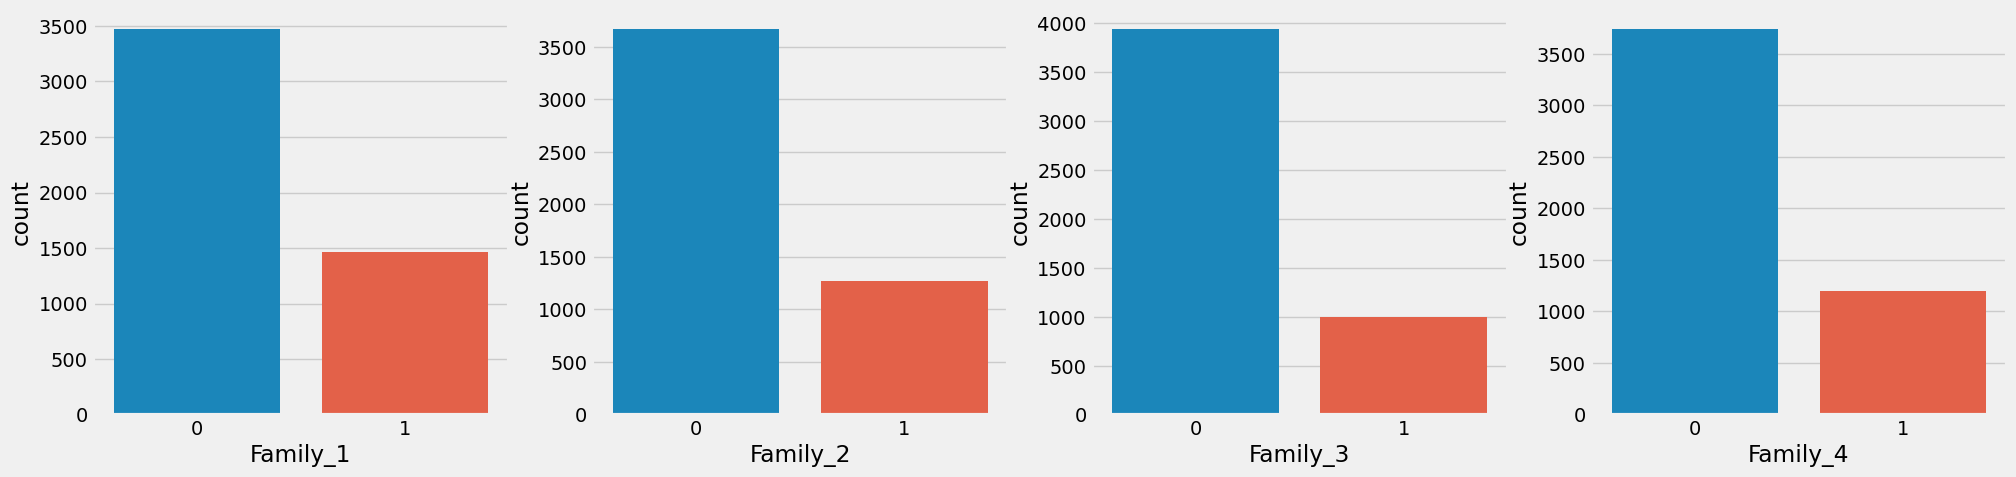

In [313]:
#  Count Plot to show Online Distributions
plt.figure(figsize=(22,5))
plt.subplot(1, 4, 1)
sns.countplot(x='Family_1',data=df_bank_personal_loan)
plt.subplot(1, 4, 2)
sns.countplot(x='Family_2',data=df_bank_personal_loan)
plt.subplot(1, 4, 3)
sns.countplot(x='Family_3',data=df_bank_personal_loan)
plt.subplot(1, 4, 4)
sns.countplot(x='Family_4',data=df_bank_personal_loan)
plt.show()

Family with 1 member seems to be more compared to the other in the data.

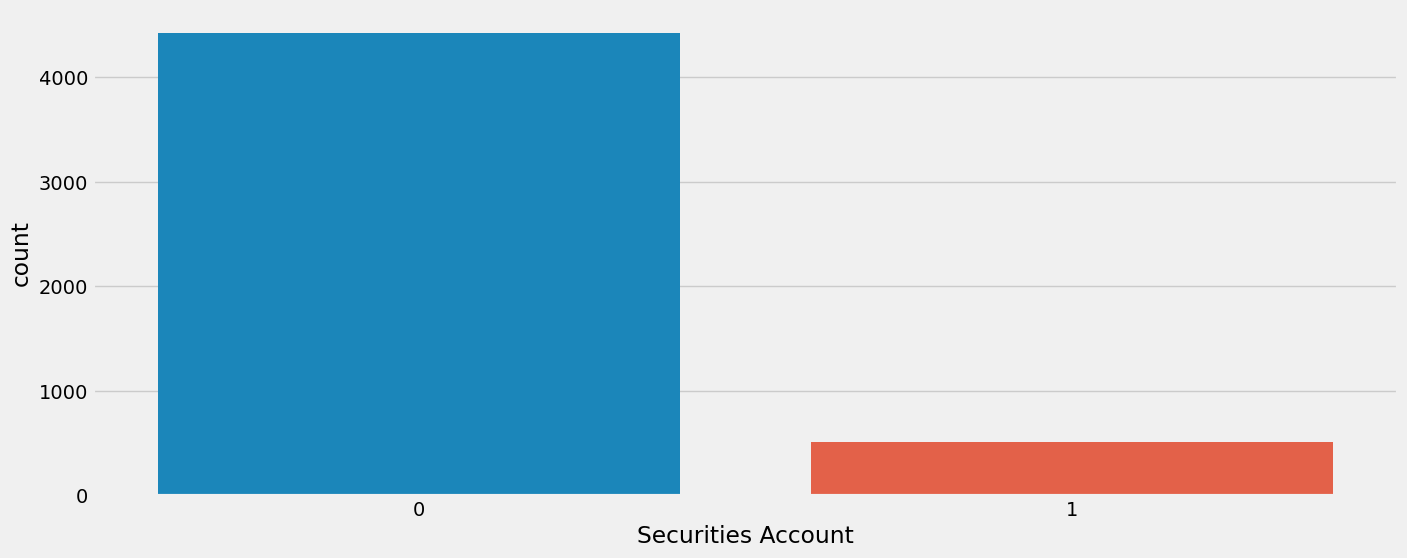

In [314]:
sns.countplot(x='Securities Account',data=df_bank_personal_loan)
plt.show()

customers with Securities Account is less compared to the customers who dont have Securities Account.

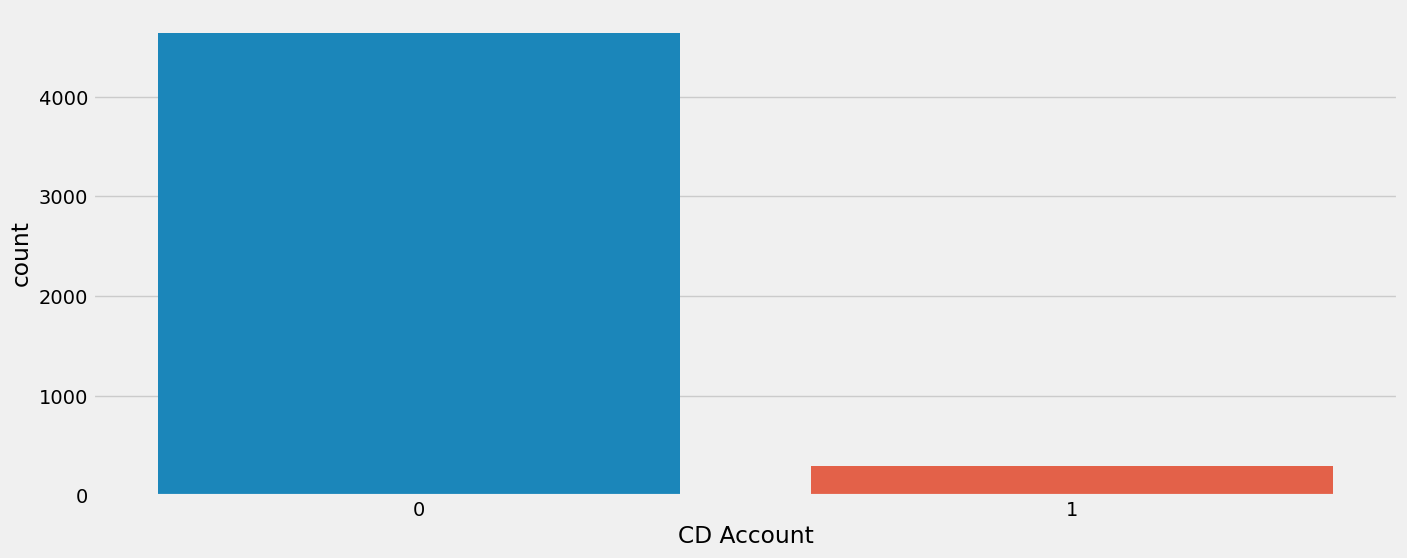

In [315]:
sns.countplot(x='CD Account',data=df_bank_personal_loan)
plt.show()

customers with Certificate of Deposit Account is less compared to the customers who dont have CD Account.

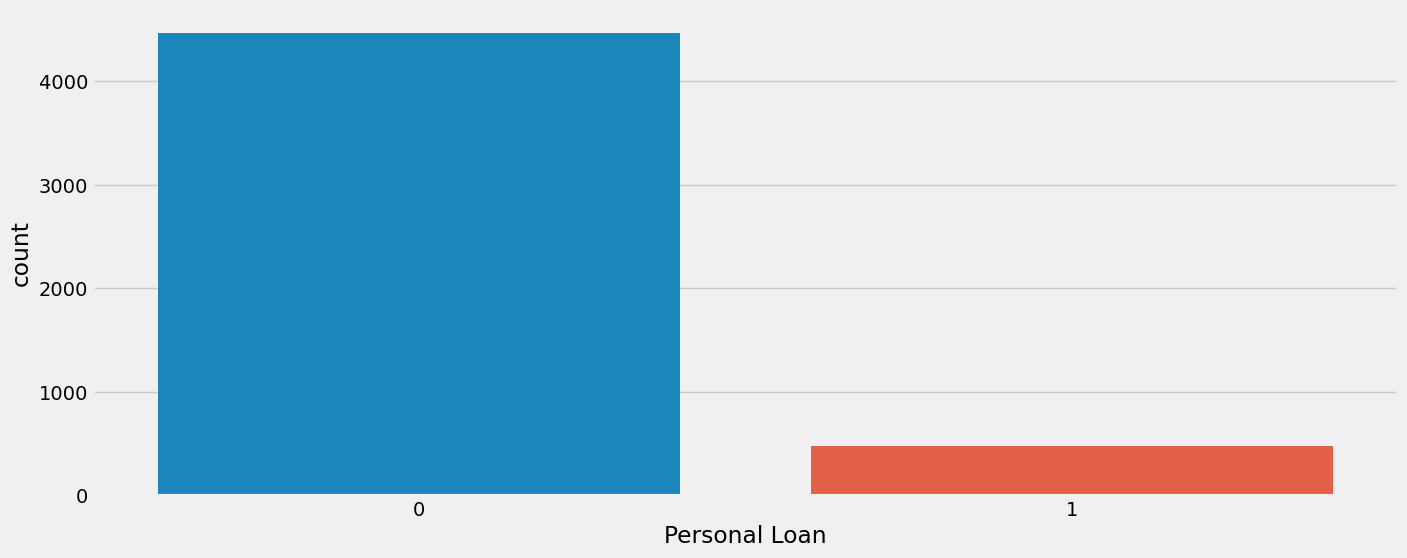

In [316]:
sns.countplot(x='Personal Loan',data=df_bank_personal_loan)
plt.show()

People with Personal Loan seems to be 85% less than the people who have not taken have personal loan.

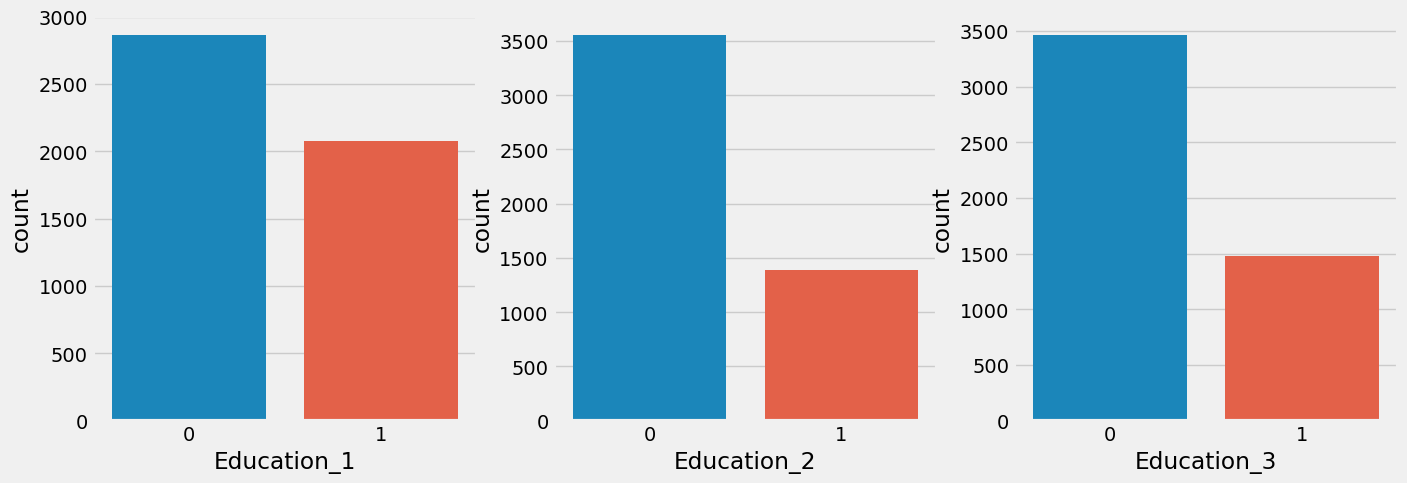

In [317]:
# Count Plot to show Education Distributions
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(x='Education_1',data=df_bank_personal_loan)
plt.subplot(1, 3, 2)
sns.countplot(x='Education_2',data=df_bank_personal_loan)
plt.subplot(1, 3, 3)
sns.countplot(x='Education_3',data=df_bank_personal_loan)
plt.show()

Education 1 - Undergrad is more compared to other education levels.


<Axes: xlabel='CreditCard', ylabel='count'>

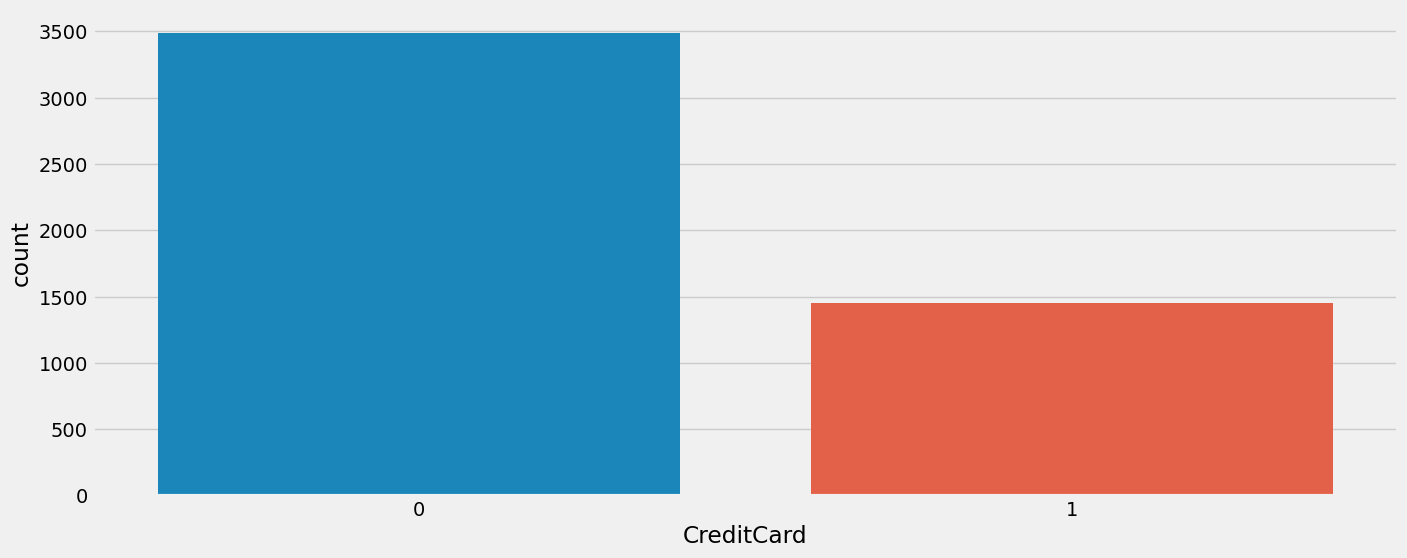

In [318]:
# Count Plot to show CreditCard Distributions
sns.countplot(x='CreditCard',data=df_bank_personal_loan)

People without creditcard are more than the people who use credit card.

<Axes: xlabel='Online', ylabel='count'>

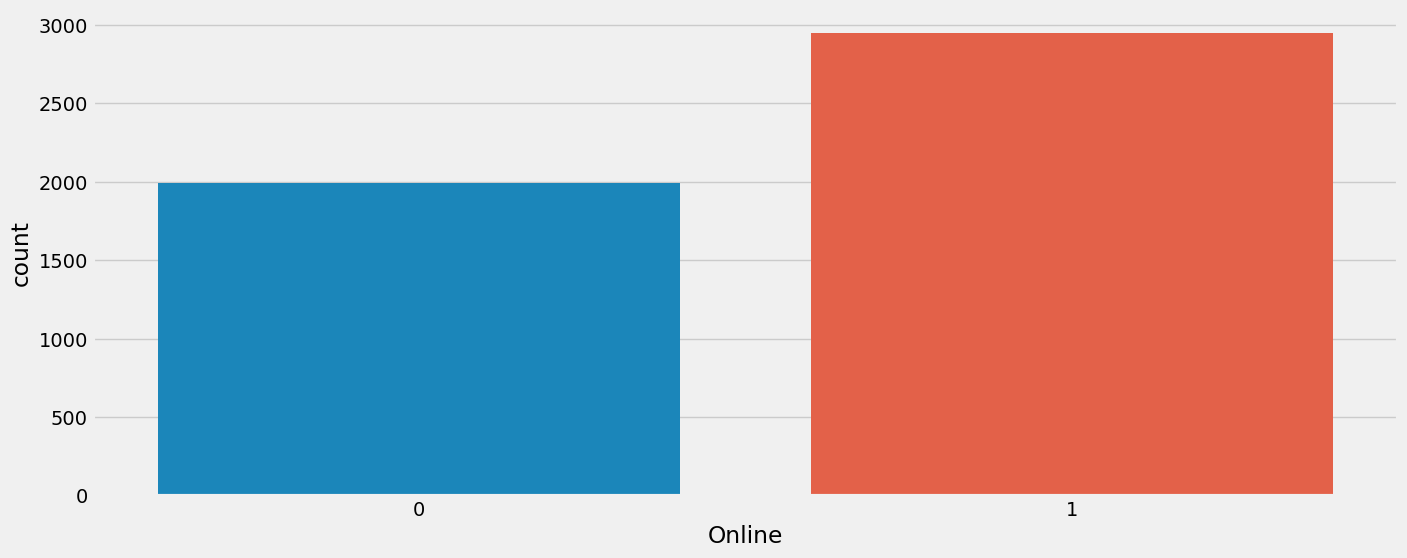

In [319]:
#  Count Plot to show Online Distributions
sns.countplot(x='Online',data=df_bank_personal_loan)

People who use Online Transactions are more compared to one who dont use online Transactions.

# Multivariate Analysis

<Axes: xlabel='Education_1', ylabel='Income'>

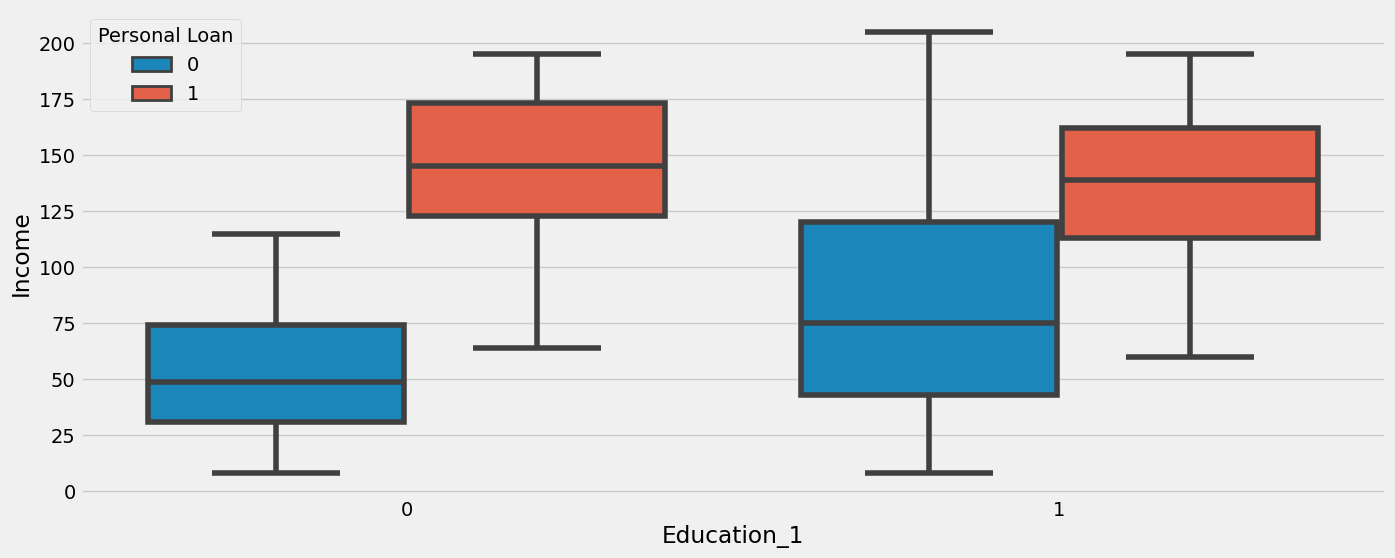

In [320]:
# Influence of income and education on personal loan
sns.boxplot(x='Education_1',y='Income',hue='Personal Loan',data=df_bank_personal_loan)

Observation : It seems the customers whose education level is 1 is having more income and they have not taken the personal loan. However customers who have taken the personal loan have the same income levels.

<Axes: xlabel='Education_2', ylabel='Income'>

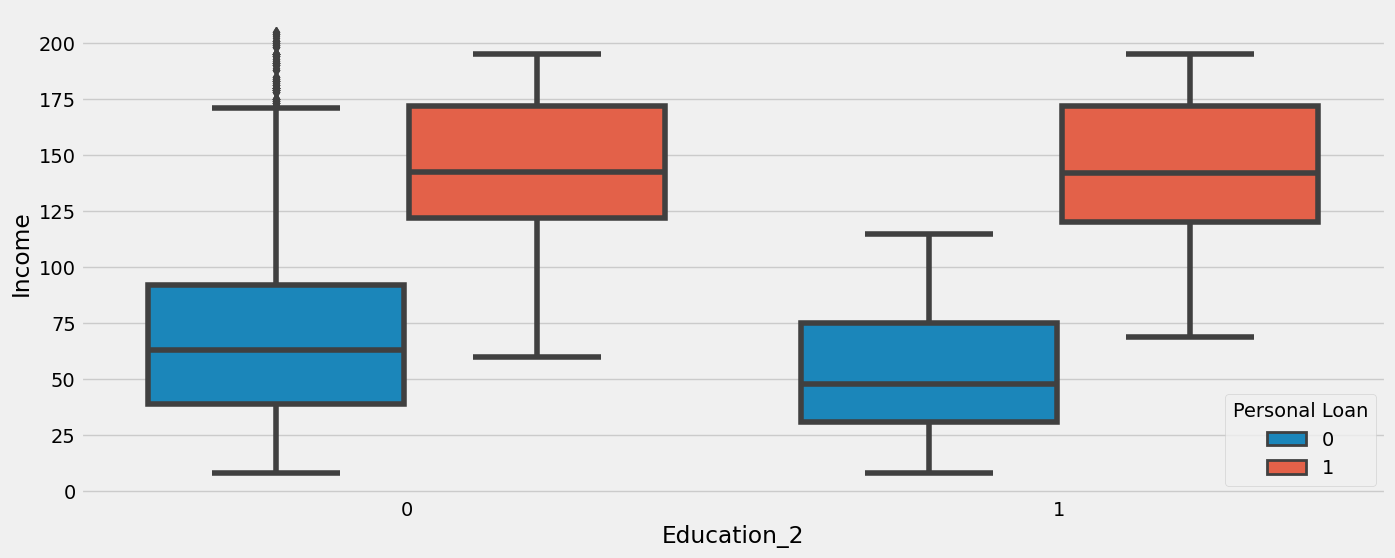

In [321]:
sns.boxplot(x='Education_2',y='Income',hue='Personal Loan',data=df_bank_personal_loan)

customers either with education level of 2 or other who have taken the personal loan have the same income levels.

<Axes: xlabel='Education_3', ylabel='Income'>

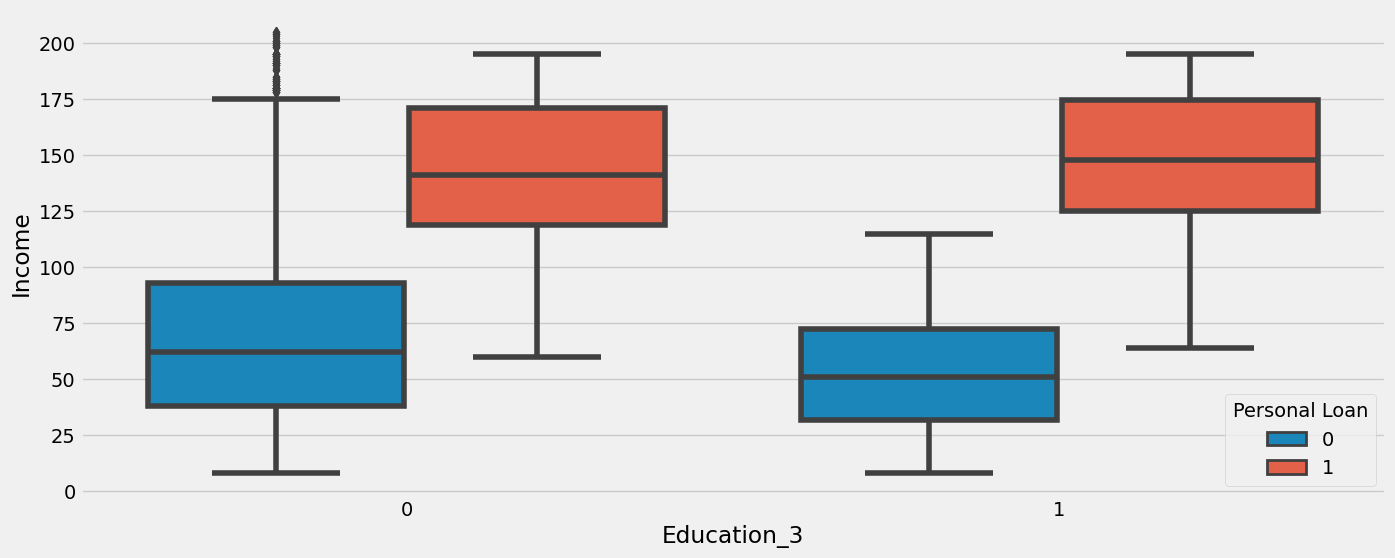

In [322]:
sns.boxplot(x='Education_3',y='Income',hue='Personal Loan',data=df_bank_personal_loan)

customers either with education level of 3 or other who have taken the personal loan have the same income levels.

<Axes: xlabel='Securities Account', ylabel='count'>

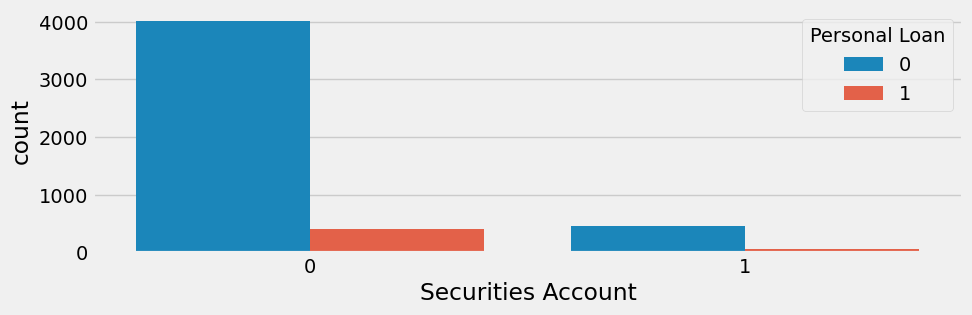

In [323]:
plt.figure(figsize=(10, 3)) 
sns.countplot(x="Securities Account", data=df_bank_personal_loan,hue="Personal Loan")


Observation : Majority of customers who does not have loan have securities account




Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

<Axes: xlabel='CD Account', ylabel='count'>

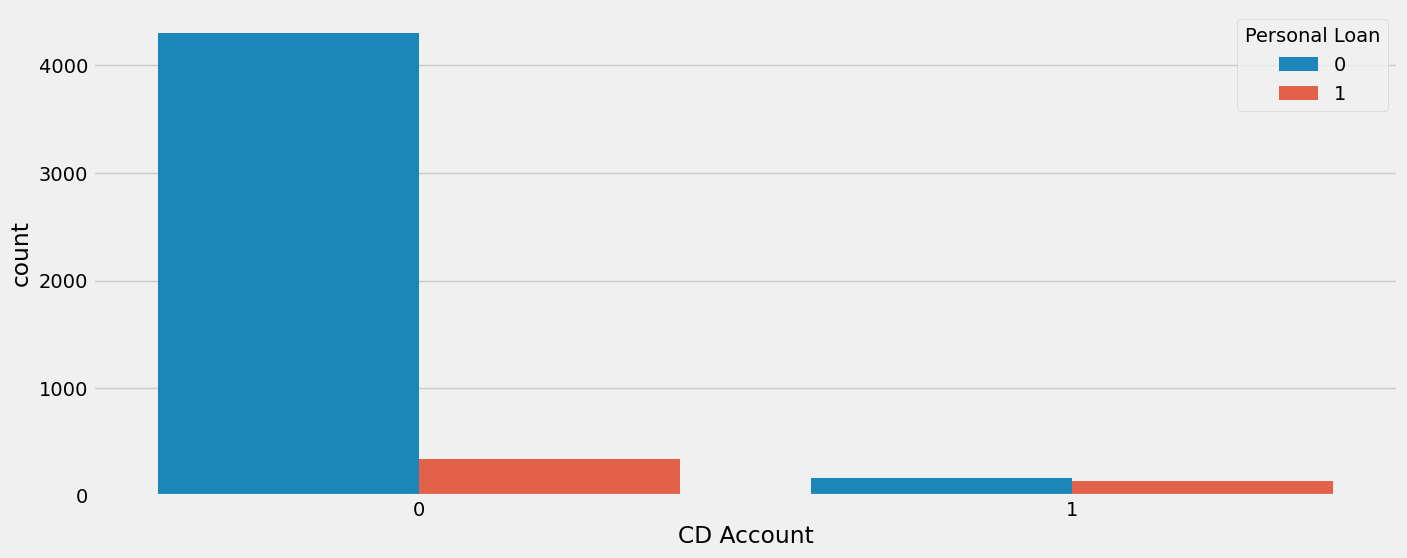

In [324]:
sns.countplot(x='CD Account',data=df_bank_personal_loan,hue='Personal Loan')


Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

<Axes: xlabel='Online', ylabel='count'>

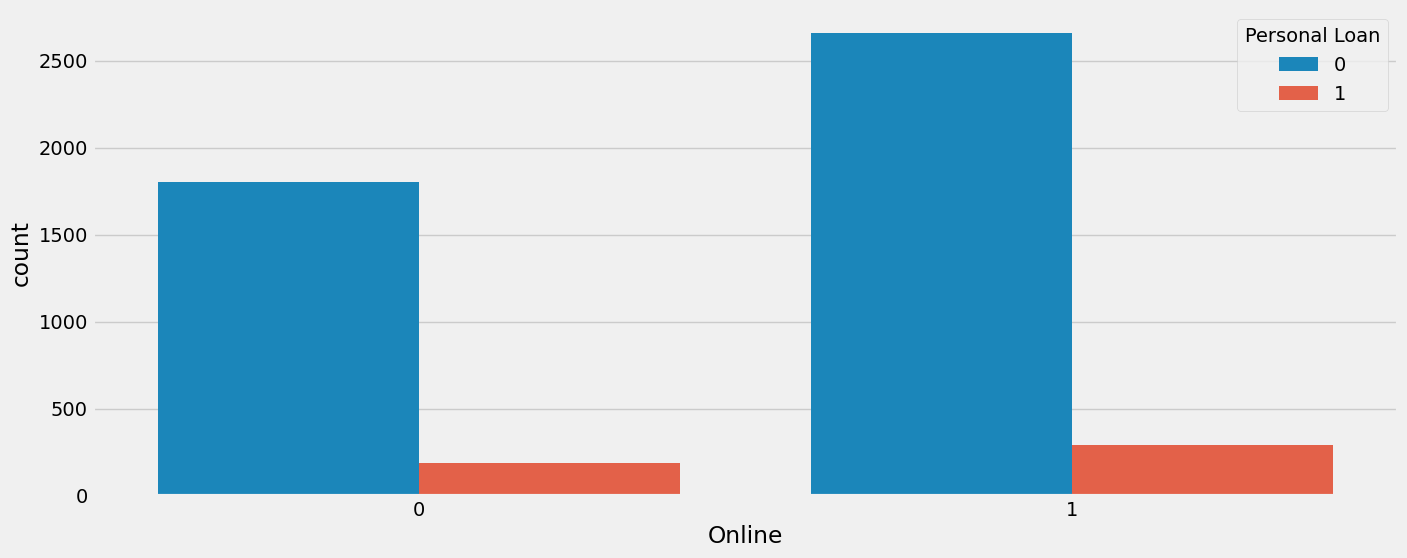

In [325]:
sns.countplot(x='Online',data=df_bank_personal_loan,hue='Personal Loan')

Custoers who use Online Transactions and do not have personal loan are more in number.

<Axes: xlabel='CCAvg', ylabel='count'>

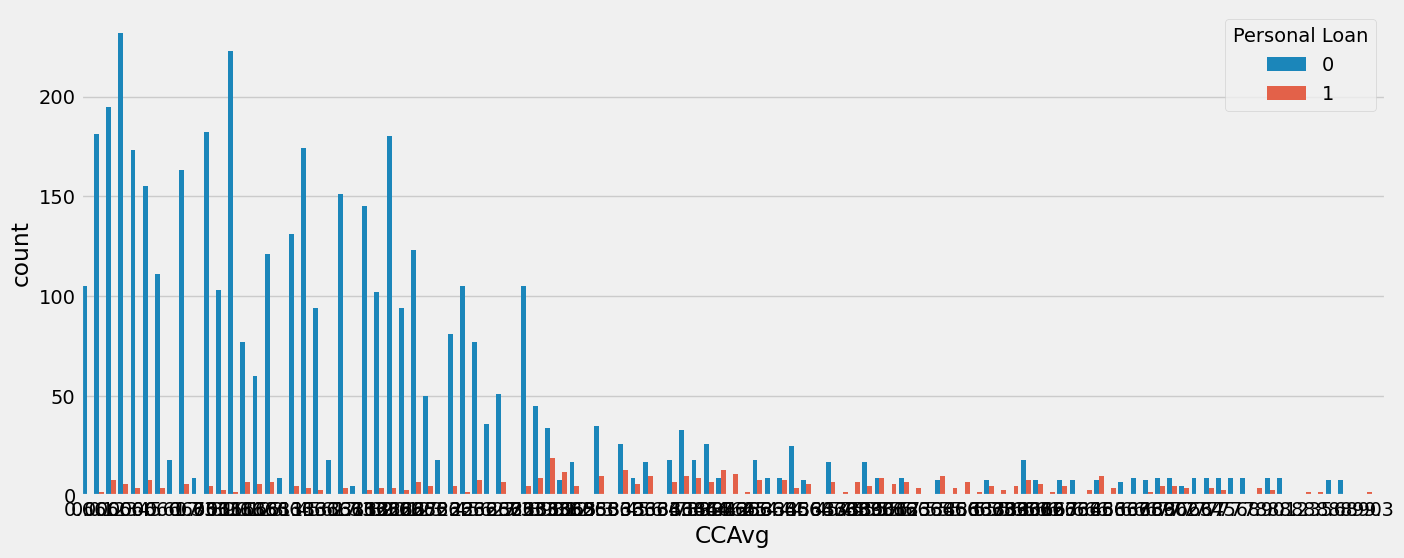

In [326]:
sns.countplot(x='CCAvg',data=df_bank_personal_loan,hue='Personal Loan')

Customer who have more creditcard spendings per month do have personal loan.

<Axes: xlabel='Mortgage', ylabel='Count'>

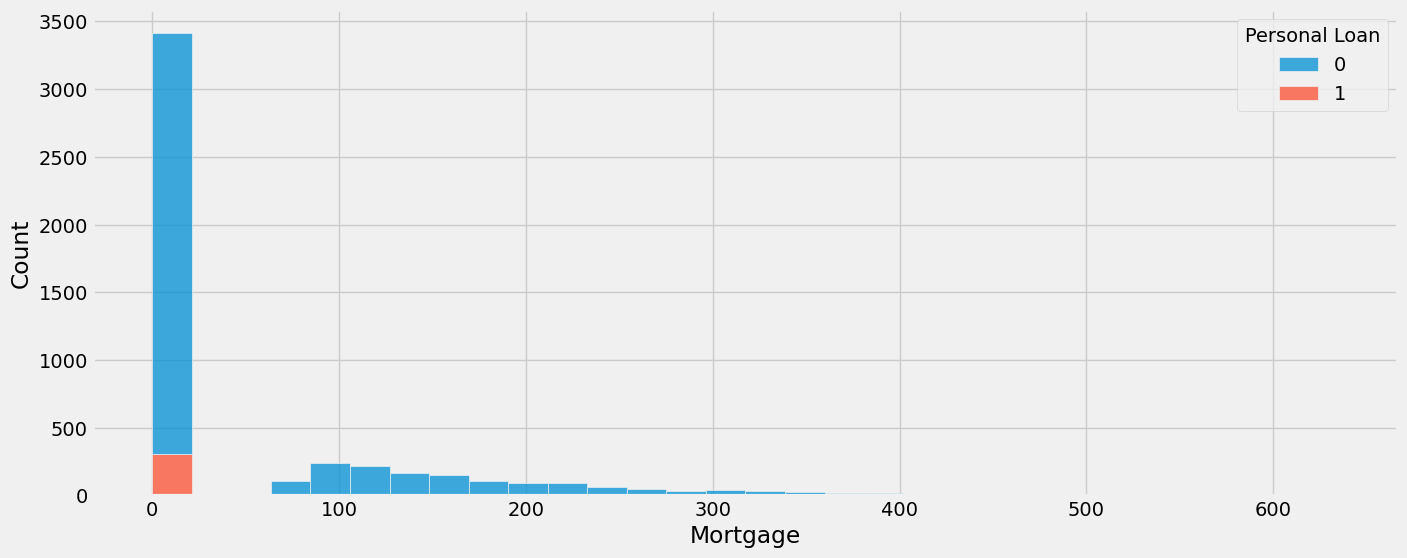

In [327]:
sns.histplot(x='Mortgage', data=df_bank_personal_loan, hue='Personal Loan', multiple='stack', bins=30)


Majority of the Customers with zero Mortgage value do not seem to have a personal loan.

<Axes: >

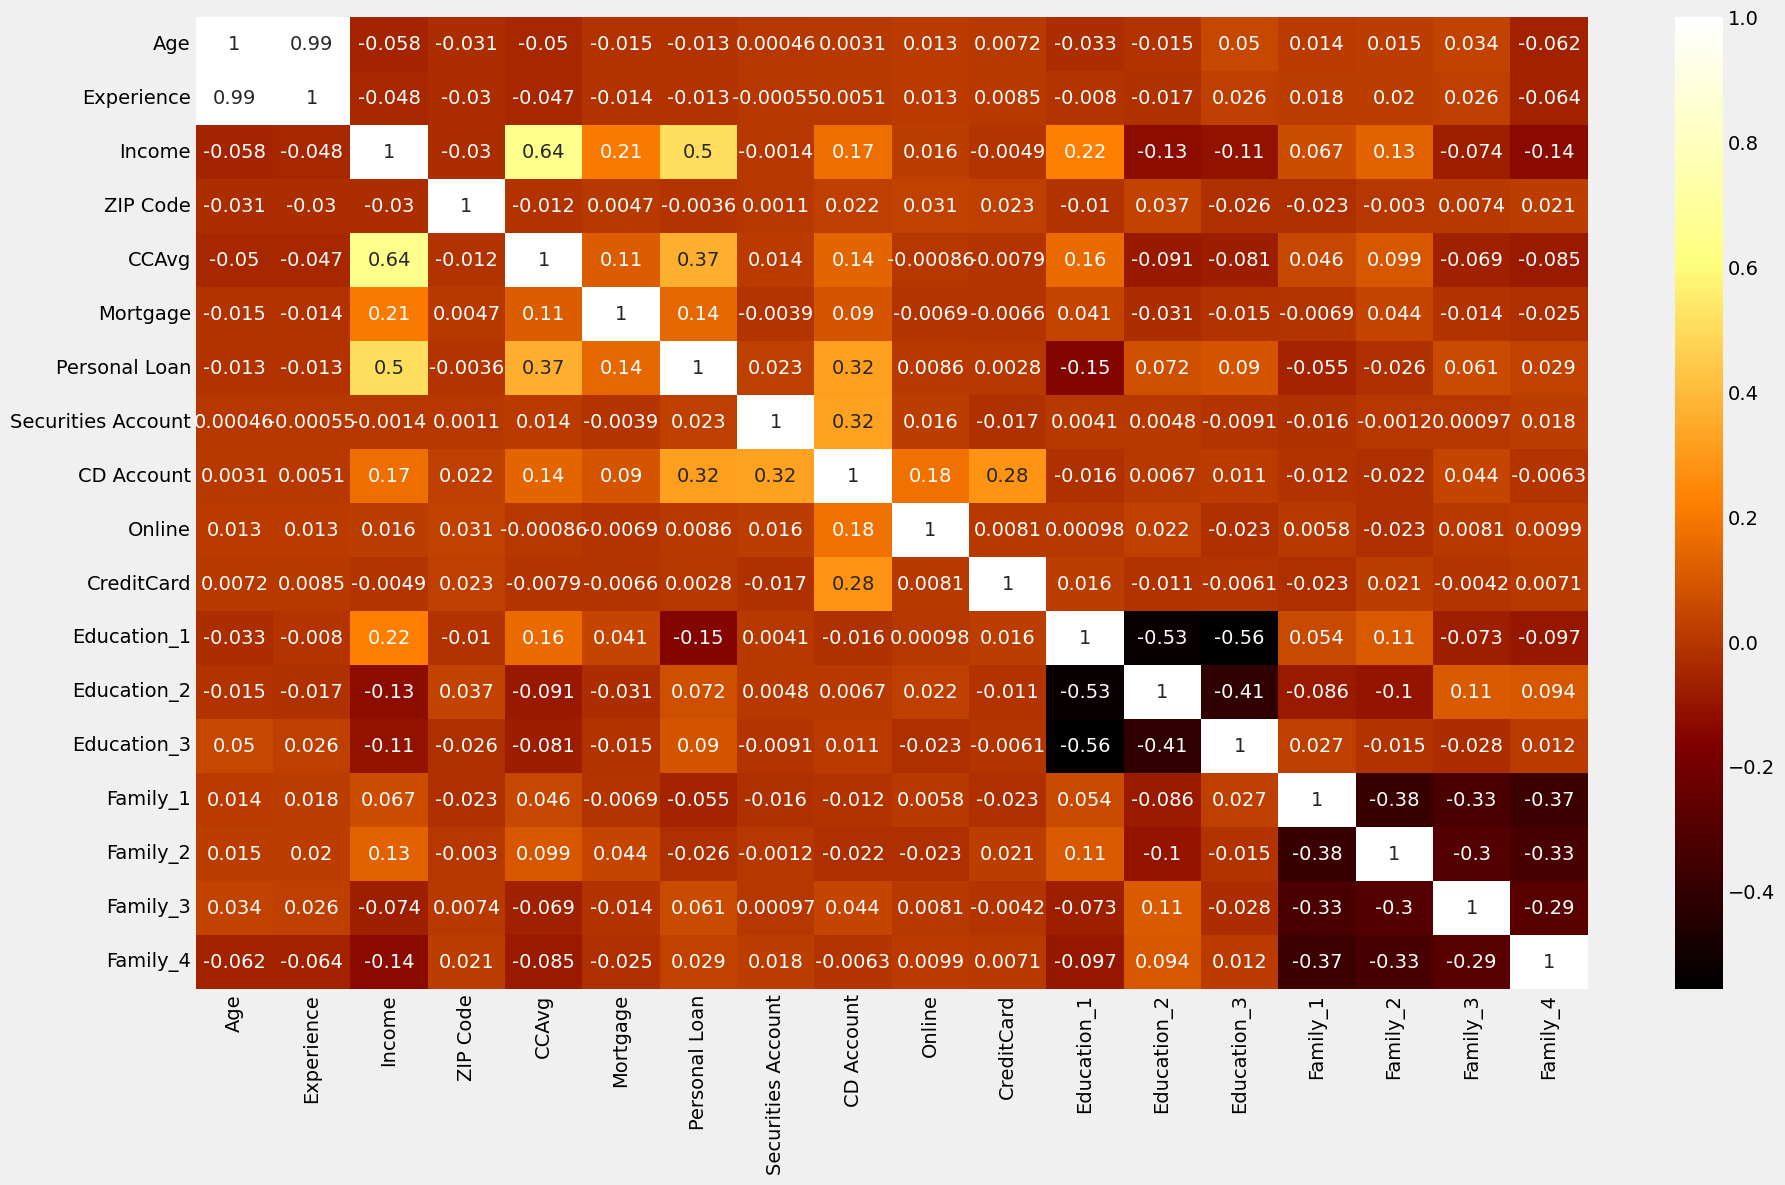

In [328]:
# CCAvg Credit average and income are highly correlated
fig = plt.subplots(figsize=(20,12))
sns.heatmap(df_bank_personal_loan.corr(), cmap='afmhot' , annot = True)

I see that both the Experience and Age feature are highly correlated.
So, I need to drop one of both to have my model predict better.

In [329]:
df_bank_personal_loan.drop(['Experience'],axis=1,inplace=True)


In [330]:
df_bank_personal_loan.head()

,Age,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,49,91107,1.6,0,0,1,0,0,0,1,0,0,0,0,0,1
1,45,34,90089,1.5,0,0,1,0,0,0,1,0,0,0,0,1,0
2,39,11,94720,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,100,94112,2.7,0,0,0,0,0,0,0,1,0,1,0,0,0
4,35,45,91330,1.0,0,0,0,0,0,1,0,1,0,0,0,0,1


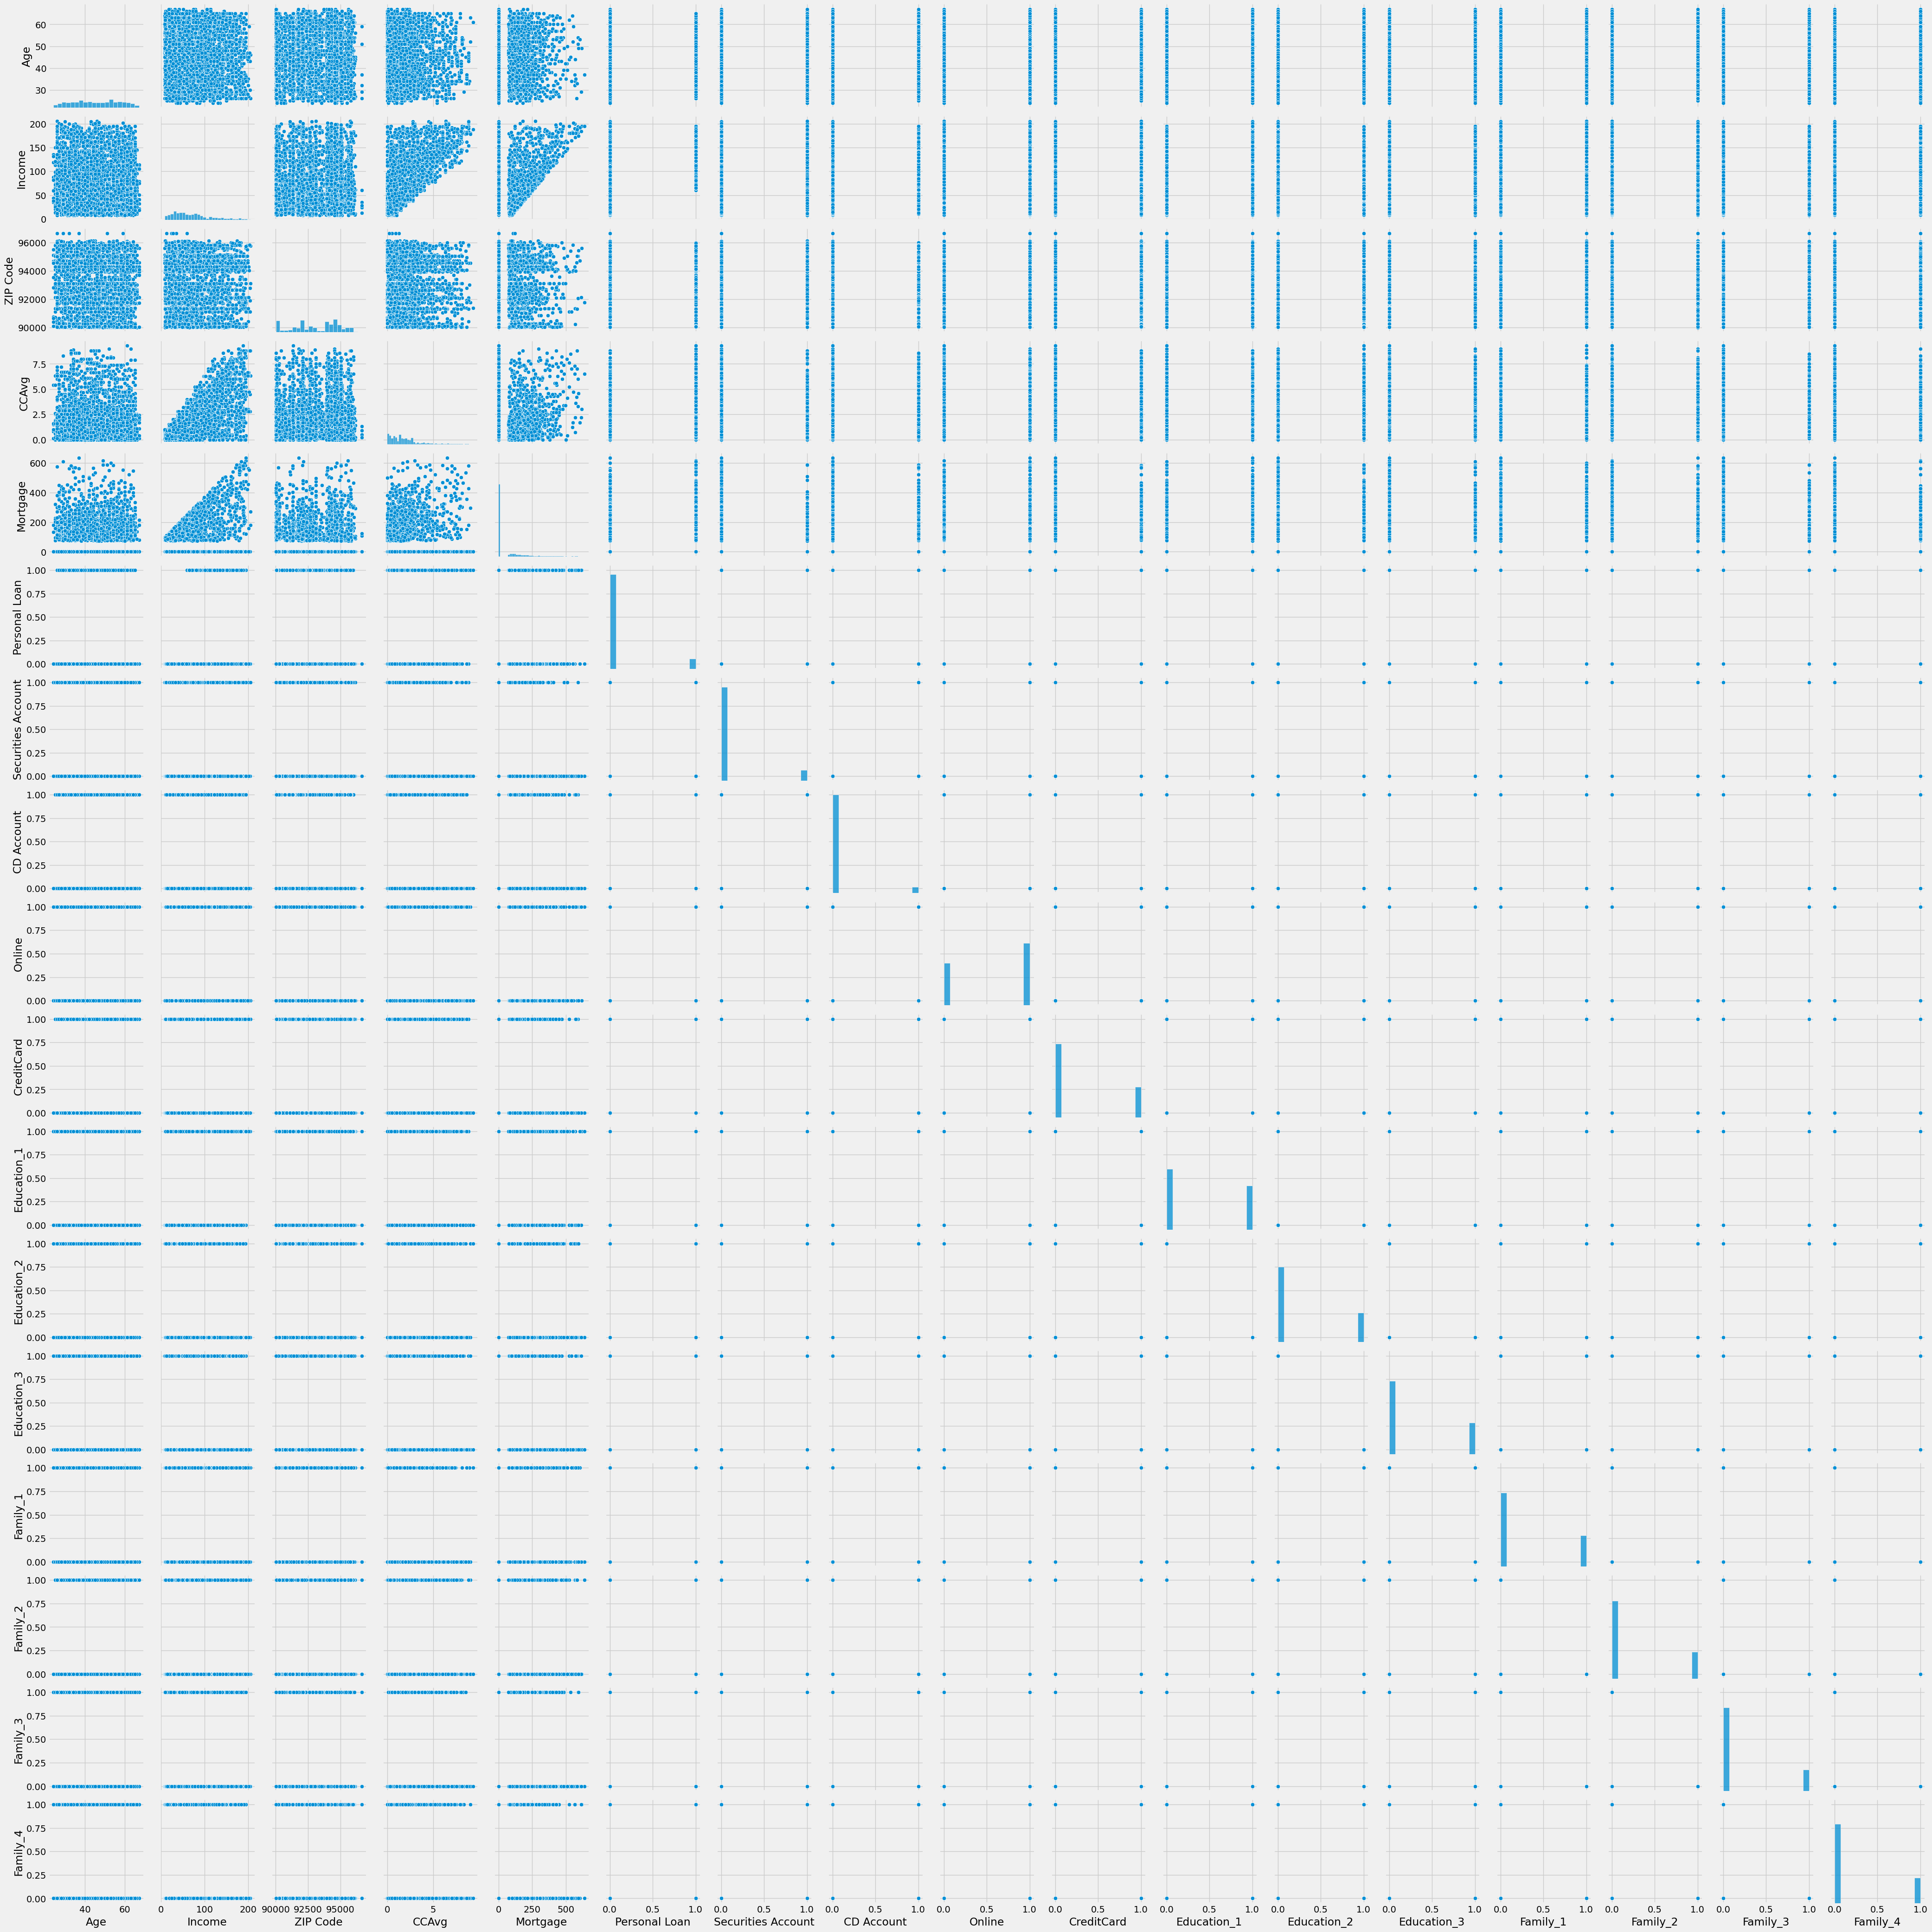

In [331]:
sns.pairplot(df_bank_personal_loan)

# Handle Imbalance data


In [332]:
#Synthetic Minority Over-Sampling Technique
from imblearn.over_sampling import SMOTE
y = df_bank_personal_loan['Personal Loan']
x = df_bank_personal_loan.drop(['Personal Loan'], axis = 1)

In [333]:
x.shape

(4942, 16)

In [334]:
y.shape

(4942,)

In [335]:
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())


In [336]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(8930, 16)
(8930,)


# Applying necessary transformations for the feature variables


In [337]:
data_X = df_bank_personal_loan.loc[:, df_bank_personal_loan.columns  != 'Personal Loan']
data_Y = df_bank_personal_loan[['Personal Loan']]

In [338]:
# Applying the Yeo Johnson method of Transformation on the Income variable. 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x_rasmple['Income'].values.reshape(-1,1))
temp = pt.transform(x_rasmple['Income'].values.reshape(-1,1))
x_rasmple['Income'] = pd.Series(temp.flatten())

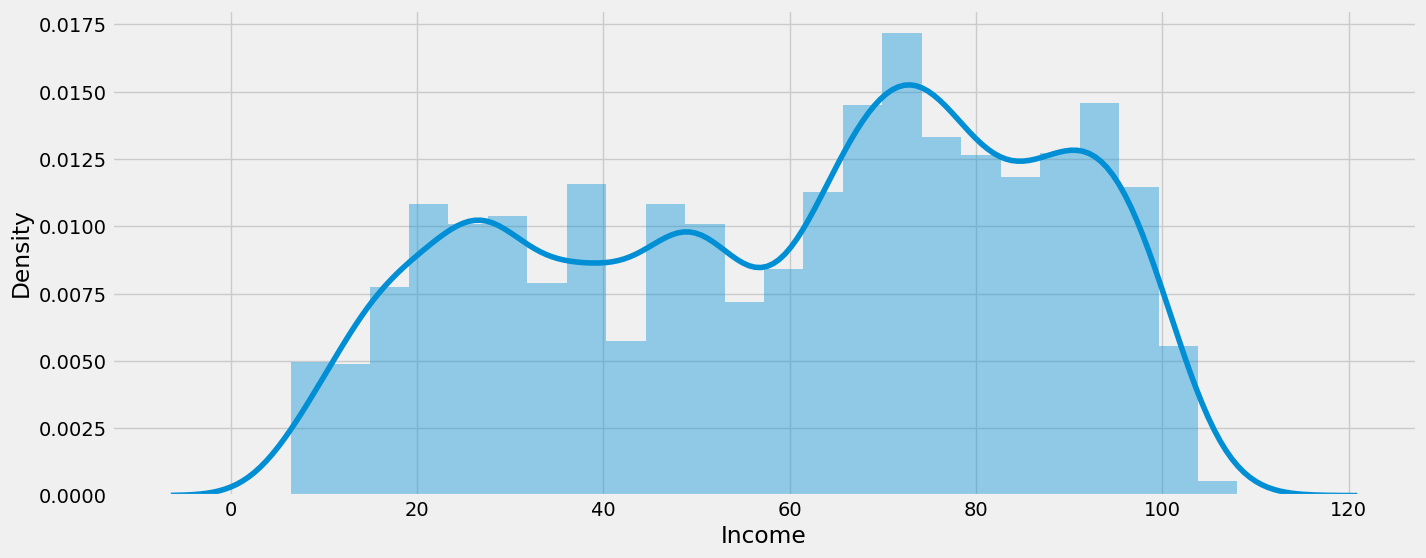

In [339]:
# Distplot to show transformed Income variable
sns.distplot(x_rasmple['Income'])
plt.show()

In [340]:
# Applying the Yeo Johnson method of Transformation on the CCAvg variable.
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x_rasmple['CCAvg'].values.reshape(-1,1))
temp = pt.transform(x_rasmple['CCAvg'].values.reshape(-1,1))
x_rasmple['CCAvg'] = pd.Series(temp.flatten())

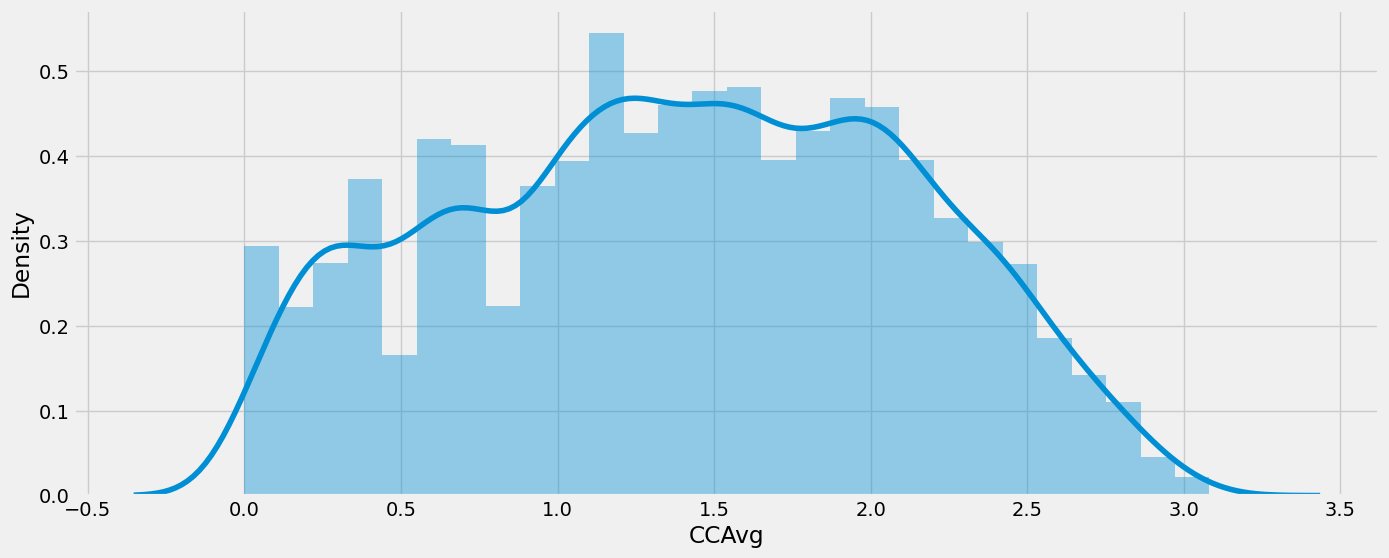

In [341]:
# Distplot to show transformed CCAvg variable
sns.distplot(x_rasmple['CCAvg'])
plt.show()

In [342]:
# Binning on Mortgage variable.
x_rasmple['Mortgage_Int'] = pd.cut(x_rasmple['Mortgage'],
                               bins=[0,100,200,300,400,500,600,700],
                               labels= [0,1,2,3,4,5,6],
                               include_lowest =True)
x_rasmple.drop('Mortgage', axis = 1, inplace= True)

In [343]:
# Applying the Yeo Johnson method of Transformation on the Mortgage variable.
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x_rasmple['Mortgage_Int'].values.reshape(-1,1))
temp = pt.transform(x_rasmple['Mortgage_Int'].values.reshape(-1,1))
x_rasmple['Mortgage_Int'] = pd.Series(temp.flatten())

# Normalise data and split the data into training and test set in the ratio of 70:30 respectively

In [344]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [345]:
# Splitting the data into train and test. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.
X_train,X_test,Y_train,Y_test = train_test_split(x_rasmple,y_rasmple,test_size = 0.3, random_state = 42,stratify = y_rasmple)

In [346]:
X_train.head()


,Age,Income,ZIP Code,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4,Mortgage_Int
1424,60,84.584241,90740,1.631440,1,1,1,0,0,1,0,1,0,0,0,-0.0
2675,38,101.711084,91710,1.631440,0,0,1,0,1,0,0,0,1,0,0,-0.0
2305,30,25.921888,94022,1.019451,0,0,1,0,1,0,0,1,0,0,0,-0.0
7339,27,67.318604,95605,1.746430,0,0,0,0,0,0,0,0,0,0,0,-0.0
5157,40,70.245110,95610,1.373171,0,0,0,0,0,0,0,0,0,0,0,-0.0


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

We will apply the StandardScaler to the dataset to standardize the input variables.

In [347]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# LOGISTIC REGRESSION

In [348]:
from sklearn.linear_model import LogisticRegression


In [349]:
model = LogisticRegression()


In [350]:
model.fit(X_train, Y_train)
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print(cv_scores)
cv_score = np.mean(cv_scores)
print(cv_score)

[0.9696243 0.968     0.9736    0.9576    0.9696   ]
0.9676848601119105


In [351]:
from sklearn.metrics import confusion_matrix, recall_score , precision_score , f1_score , accuracy_score, roc_auc_score


In [352]:
X_test_pred1 = model.predict(X_test)
X_test_pred1

array([1, 1, 0, ..., 1, 1, 0])

In [353]:
model.score(X_test,Y_test)


0.9697648376259799

In [355]:
conf_matrix = confusion_matrix(Y_test, X_test_pred1)
conf_matrix

array([[1317,   23],
       [  58, 1281]])

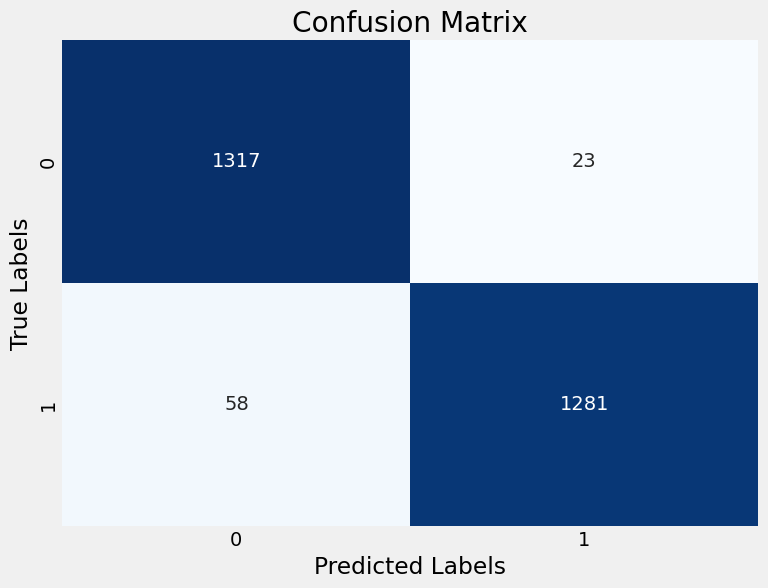

In [356]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [357]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,X_test_pred1))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1340
           1       0.98      0.96      0.97      1339

    accuracy                           0.97      2679
   macro avg       0.97      0.97      0.97      2679
weighted avg       0.97      0.97      0.97      2679



In [358]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred1))


Roc Auc Score:  0.9697599567509724


For Logistic Regression we got 97% accuracy for test data. The F1 score is 0.97.

# Decision Tree Classifier


In [359]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [360]:
model2 = DecisionTreeClassifier()


In [361]:
model2.fit(X_train, Y_train)
cv_scores2 = cross_val_score(model2, X_train, Y_train, cv=5)
print(cv_scores2)
cv_score2 = np.mean(cv_scores2)
print(cv_score2)

[0.98561151 0.9848     0.9848     0.984      0.988     ]
0.9854423021582732


In [362]:
X_test_pred2 = model2.predict(X_test)
X_test_pred2

array([1, 1, 0, ..., 1, 1, 0])

In [363]:
model2.score(X_test,Y_test)


0.9888017917133258

In [364]:
conf_matrix2 = confusion_matrix(Y_test, X_test_pred2)
conf_matrix2

array([[1323,   17],
       [  13, 1326]])

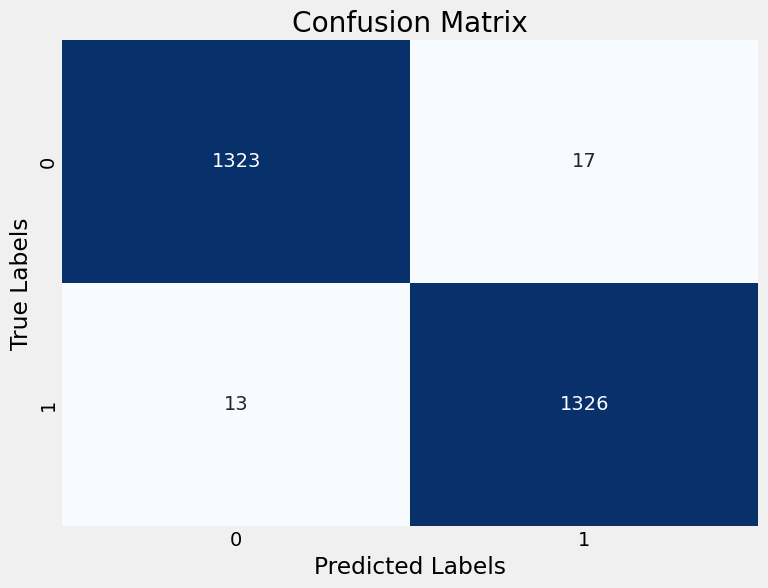

In [365]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [366]:
print(classification_report(Y_test,X_test_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1340
           1       0.99      0.99      0.99      1339

    accuracy                           0.99      2679
   macro avg       0.99      0.99      0.99      2679
weighted avg       0.99      0.99      0.99      2679



In [367]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred2))


Roc Auc Score:  0.9888023474858716


For Decision Tree Classifier, we got 99% accuracy for test data. The F1 score is 0.99.

# K-NEAREST NEIGHBORS

In [369]:
from sklearn.neighbors import KNeighborsClassifier


In [370]:
model3 = KNeighborsClassifier(n_neighbors=3)


In [371]:
model3.fit(X_train, Y_train)
cv_scores3 = cross_val_score(model3, X_train, Y_train, cv=5)
print(cv_scores3)
cv_score3 = np.mean(cv_scores3)
print(cv_score3)

[0.97601918 0.9768     0.9736     0.9656     0.9696    ]
0.9723238369304557


In [372]:
X_test_pred3 = model3.predict(X_test)
X_test_pred3

array([1, 1, 0, ..., 1, 1, 0])

In [373]:
model3.score(X_test,Y_test)


0.9772303098170959

In [374]:
conf_matrix3 = confusion_matrix(Y_test, X_test_pred3)
conf_matrix3

array([[1320,   20],
       [  41, 1298]])

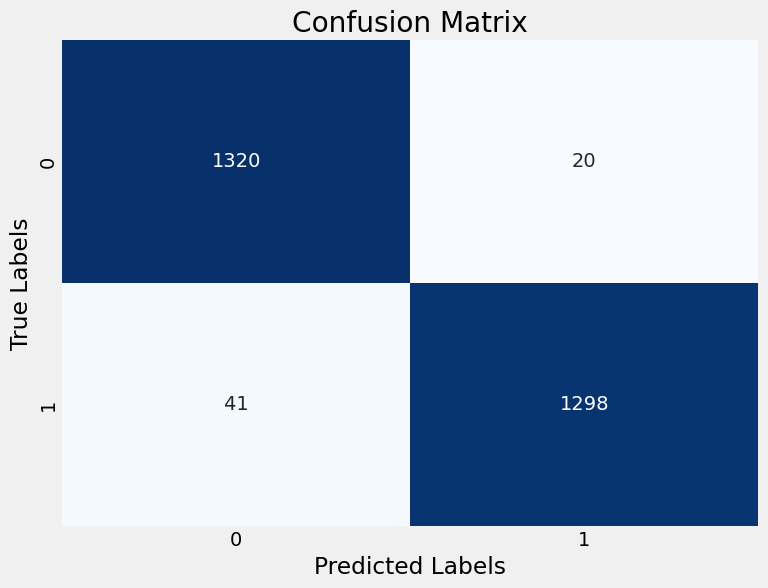

In [375]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [376]:
print(classification_report(Y_test,X_test_pred3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1340
           1       0.98      0.97      0.98      1339

    accuracy                           0.98      2679
   macro avg       0.98      0.98      0.98      2679
weighted avg       0.98      0.98      0.98      2679



In [377]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred3))


Roc Auc Score:  0.9772273806471748


For KNN, we got 98% accuracy for test data. The F1 score is 0.97.

# Random Forest Classifier

In [378]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state=42)

In [379]:
model4.fit(X_train, Y_train)
cv_scores4 = cross_val_score(model4, X_train, Y_train, cv=5)
print(cv_scores4)
cv_score4 = np.mean(cv_scores4)
print(cv_score4)

[0.99280576 0.9888     0.9856     0.988      0.9928    ]
0.9896011510791368


In [380]:
X_test_pred4 = model4.predict(X_test)
X_test_pred4

array([1, 1, 0, ..., 1, 1, 0])

In [381]:
model4.score(X_test,Y_test)

0.9944008958566629

In [382]:
conf_matrix4 = confusion_matrix(Y_test, X_test_pred4)
conf_matrix4

array([[1330,   10],
       [   5, 1334]])

In [383]:
print(classification_report(Y_test,X_test_pred4))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1340
           1       0.99      1.00      0.99      1339

    accuracy                           0.99      2679
   macro avg       0.99      0.99      0.99      2679
weighted avg       0.99      0.99      0.99      2679



In [384]:
print("Roc Auc Score: ", roc_auc_score(Y_test,X_test_pred4))


Roc Auc Score:  0.9944015917425568


For Random Forest, we got 99% accuracy for test data. The F1 score is 0.99.

# ROC Curve

Model AUC score for Logistic regression: 0.9697599567509724
Model AUC score for decision tree: 0.9888023474858716
Model AUC score for KNN: 0.9772273806471748
Model AUC score for random forest: 0.9944015917425568


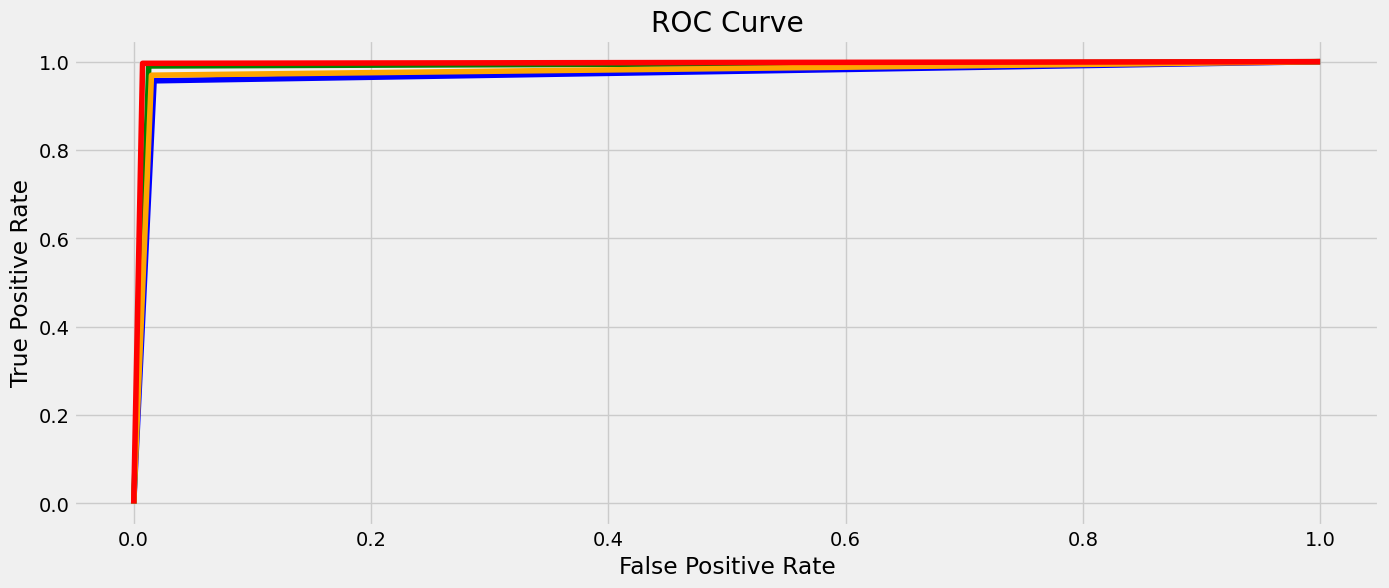

In [389]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob, color='green'):
    """
    plots the roc curve based on the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, color=color)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(Y_test, X_test_pred1, color='Blue')
print(f'Model AUC score for Logistic regression: {roc_auc_score(Y_test, X_test_pred1)}')
plot_roc_curve(Y_test, X_test_pred2, color='green')
print(f'Model AUC score for decision tree: {roc_auc_score(Y_test, X_test_pred2)}')
plot_roc_curve(Y_test, X_test_pred3, color='orange')
print(f'Model AUC score for KNN: {roc_auc_score(Y_test, X_test_pred3)}')
plot_roc_curve(Y_test, X_test_pred4, color='red')
print(f'Model AUC score for random forest: {roc_auc_score(Y_test, X_test_pred4)}')

The Random Forest model's ROC curve is slightly better than the Decision Tree's ROC curve as it is closer to the top-left corner of the graph.
The AUC score for the Random Forest is slightly higher than that of the Decision Tree (0.9936 vs. 0.9906), indicating that the Random Forest performs slightly better in terms of distinguishing between the positive and negative classes based on the dataset.
All the four AUC scores are above 0.5, which means that all the models perform better than random guessing.

# Business understanding of the model


In the first step of this project we imported various libraries and our data. Than we found out various things about our data.

We have to make the model to predict whether a person will take personal loan or not.
We found that age and experience are highly correlated so we droped the experience column.
ID was not contributing factor for a person to take loan,so we dropped it.
Then we used SMOTE (Synthetic Minority Over-sampling Technique) algorithm to for addressing class imbalance.
Reason for class Imbalance: 
Class imbalance occurs when one class has significantly fewer samples than the other(s), leading to potential challenges in model training and biased predictions.

The Income,CCAvg and the mortgage column were right skewed so we applied Power transformation to them to normalize them.

StandardScaler to the dataset to standardize the input variables.



After this we used several models to make predictions.

Logistic Regression,
Decision Tree Classifier,
K Neighbors Classifier and
Random Forest

# Conclusion


The aim of the universal bank is to convert their liability customers into loan customers.
They want to set up a new marketing campaign; 
hence, they need information about the connection between the variables given in the data. 
Four classification algorithms were used in this project. 
From the implementation, we see that both Decision tree and the Random Forest Classifier have the highest accuracy and we can choose both for our prediction.
Also, from the Exploratory data Analysis, We were able to observe that Income is the most influential feature for our prediction.Also, the weights of the features used for Lgistic regression helped us confirm this.